# Figure 3: Ranking Drugs

1. Find drugs used for nash: https://www.nature.com/articles/s41575-020-00408-y
2. Find controls: ATC browser https://go.drugbank.com/atc/L04
- NSAIDs
- Anti inflammatories
3. Identify drug targets - essentially just look up target and find gene symbol
4. Add drug target and label to drug.csv

Note: drugs_old.csv contains old list of NASH drugs, including drugs that had been terminated in phase 2/3 years ago. Drugs.csv now only contains NASH drugs mentioned in Table 2 of the nature paper above.

todo: narrow targets for drugs already in list, add negative controls

In [41]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## 1. Load scored genes using final trained model

In [3]:
scores = pd.read_csv('../../results/final_model_svc/all_gene_scores.csv', index_col=0)

In [10]:
scores

,score,known
0,,
PTGS2,0.981269,0
HMOX1,0.976353,0
NFE2L2,0.968064,1
NOS2,0.965863,0
POR,0.965423,0
...,...,...
CAND2,0.002541,0
RSPH9,0.002440,0
LRRC6,0.002370,0


## 2. Load table of drugs, targets, and their indications

In [12]:
drugs = pd.read_csv('../../data/gene_maps/drug.csv', index_col=0)

## 3. Join with scores

In [35]:
drugs_scores = drugs.join(scores, how='inner').sort_values('score', ascending=False).reset_index()

In [53]:
drugs_scores['drug-target'] = drugs_scores.apply(lambda row: row['module'] + ' ' + row['index'], axis=1)

In [54]:
drugs_scores

,index,module,use,phase,notes,score,known,drug-target
0,PTGS2,NSAID,NSAID,NaN,NaN,0.981269,0,NSAID PTGS2
1,PPARA,ELAFIBRANOR,nash,beyond phase 2,terminated due to lack of efficacy,0.959624,1,ELAFIBRANOR PPARA
2,PTGS1,NSAID,NSAID,NaN,NaN,0.935836,0,NSAID PTGS1
3,SCD,ARAMCHOL,nash,beyond phase 2,recruiting phase 3,0.908184,0,ARAMCHOL SCD
4,MT-CO2,NSAID,NSAID,NaN,NaN,0.867116,0,NSAID MT-CO2
5,MAP3K5,SELONSERTIB,nash,NaN,terminated due to lack of efficacy,0.865086,1,SELONSERTIB MAP3K5
6,IL23R,INTERLEUKIN INHIBITORS,immunosuppressant,NaN,NaN,0.860513,0,INTERLEUKIN INHIBITORS IL23R
7,THRB,RESMETIROM,nash,beyond phase 2,recruiting phase 3,0.857622,1,RESMETIROM THRB
8,PPARD,ELAFIBRANOR,nash,beyond phase 2,terminated due to lack of efficacy,0.857177,1,ELAFIBRANOR PPARD
9,NR1H4,OBETICHOLIC ACID,nash,beyond phase 2,received fda crl,0.856950,1,OBETICHOLIC ACID NR1H4


### Plot drugs and scores - separate drug targets

<AxesSubplot:xlabel='score', ylabel='drug-target'>

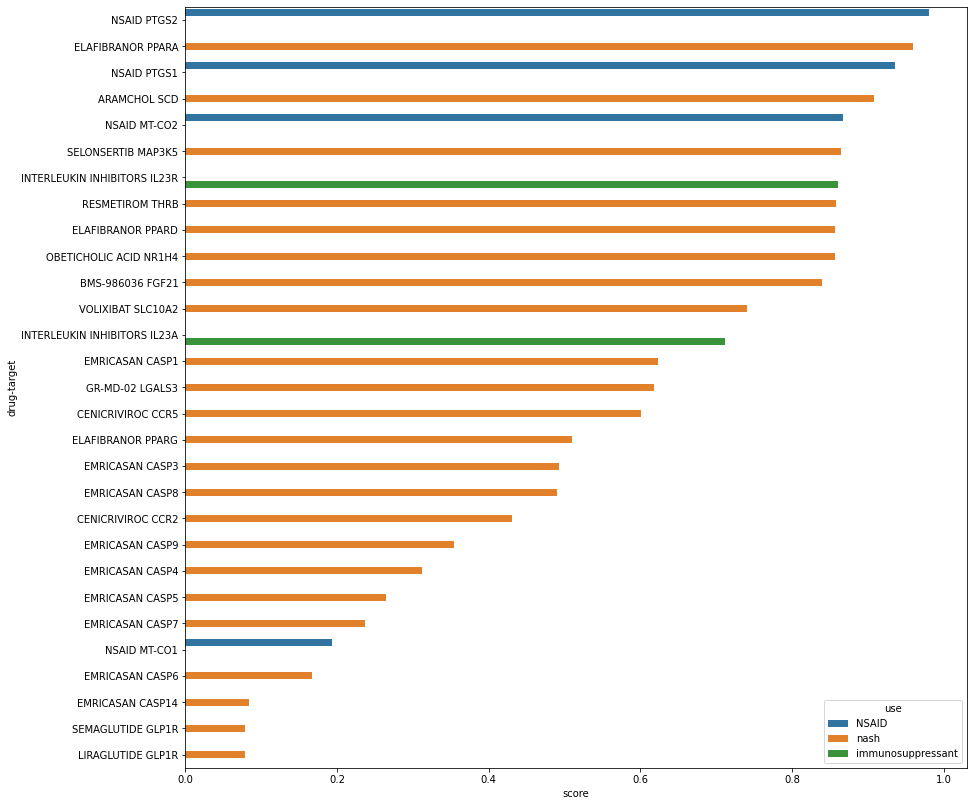

In [56]:
plt.figure(figsize=(14,14))
sns.barplot(y='drug-target', x='score', hue='use', data=drugs_scores, ci=None)


## Plot - just drug names and scores

In [67]:
best_scoring = pd.DataFrame(drugs_scores.groupby('module').max()).sort_values('score', ascending=False).reset_index()

<AxesSubplot:xlabel='score', ylabel='module'>

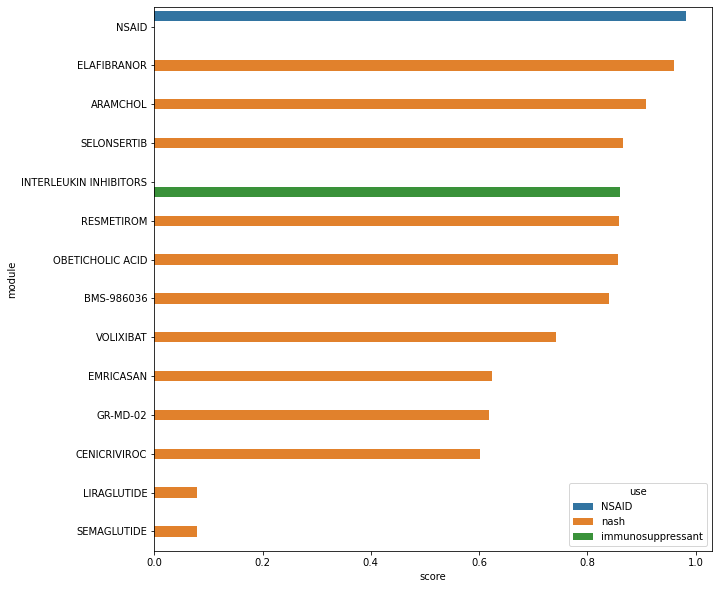

In [72]:
plt.figure(figsize=(10,10))
sns.barplot(y='module', x='score', hue='use', data=best_scoring, ci=None)